In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


In [2]:
# function for  normalization 
def norm(x):
    return (x - X_stats['mean']) / X_stats['std']

def norm_1(y):
    return (y - y_stats['mean']) / y_stats['std']

In [3]:

# 
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='latin-1')



In [4]:
# 5 rows of the data 
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [6]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual Salary'}>,
        <AxesSubplot:title={'center':'credit card debt'}>],
       [<AxesSubplot:title={'center':'net worth'}>,
        <AxesSubplot:title={'center':'car purchase amount'}>]],
      dtype=object)

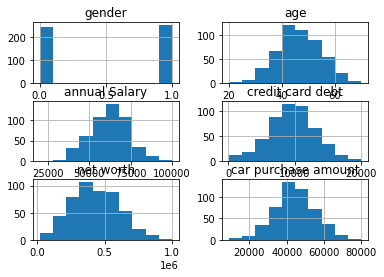

In [7]:
df.hist()

In [8]:
# check if there is any null value available or not 
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
#Dropping the columns that we dont need 

New_df = df.drop(['customer name', 'country', 'customer e-mail'], axis=1)
New_df.shape

(500, 6)

In [10]:
# define x and y using iloc function 
x = New_df.iloc[:,:-1]
y = New_df.iloc[:,-1]



x.shape 

(500, 5)

In [11]:
# to normalization we need mean value and standard deviation 
# here , i am not doing normalization by sklearn library 

X_stats = x.describe().transpose()
X_stats

y_stats = y.describe().transpose()


In [12]:
X = norm(x)
Y = norm_1(y)
X = np.array(X)
Y = np.array(Y)



In [13]:
# using sklearn library split in training data set and the testing data set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [14]:
#Define the input layer 

input_layer = Input(shape=5)
first_dense = Dense(units='128',activation='relu')(input_layer)
second_dense = Dense(units='128',activation='relu')(first_dense)
# output will be fed directly from the second dense 

third_dense = Dense (units = '64',activation='relu')(second_dense)

# y2 output come via third dense layer 
y2_output = Dense(units = '1', name= 'output')(third_dense)

model = Model(inputs = input_layer,
             outputs = [y2_output])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 25,601
Trainable params: 25,601
Non-trainable params: 0
_________________________________________________________________
None


2022-11-17 17:25:15.096061: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=optimizer, 
             loss = {'output':'mse' })

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
# Train the model for 500 epochs
history = model.fit(X_train, y_train,
                    epochs=
                    500, validation_data=(X_test, y_test))

2022-11-17 17:25:15.322986: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
12/12 [==============================] - 1s 21ms/step - loss: 1.0173 - val_loss: 0.9312
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.9824 - val_loss: 0.8971
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.9478 - val_loss: 0.8652
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.9155 - val_loss: 0.8347
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 0.8841 - val_loss: 0.8053
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.8539 - val_loss: 0.7767
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.8246 - val_loss: 0.7495
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.7959 - val_loss: 0.7222
Epoch 9/500
12/12 [==============================] - 0s 7ms/step - loss: 0.7675 - val_loss: 0.6960
Epoch 10/500
12/12 [==============================] - 0s 7ms/step - loss: 0.7397 - val_loss: 0.6705
Epoch 11

In [17]:
def plot_diff(y_true, y_pred, title=''):
    plt.figure(figsize=(4,4),dpi=150)
    plt.scatter(y_true, y_pred,color='blue')
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-10, 10], [-10, 10],color='red')
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.figure(figsize=(4,4),dpi=150)
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

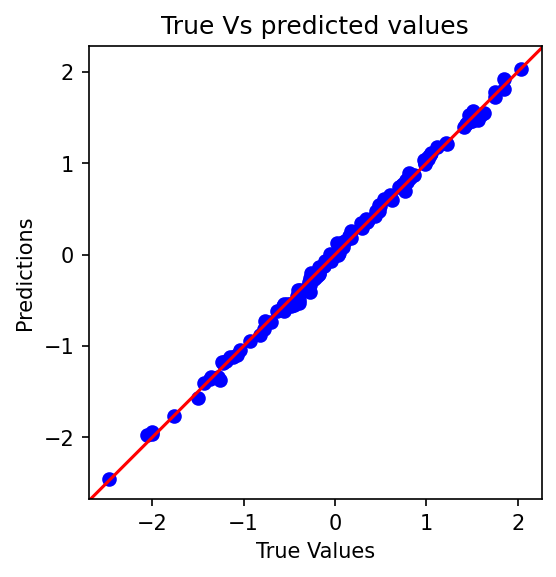

In [18]:
Y_pred = model.predict(X_test)
plot_diff(y_test, Y_pred, title='True Vs predicted values')




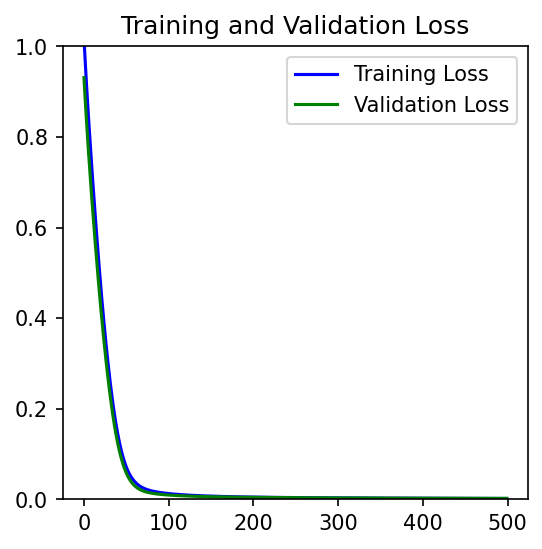

In [19]:
plot_metrics(metric_name='loss', title='Training and Validation Loss', ylim=1)